## Penguin Prediction

This notebook trains an ML model (AI if you are feeling pretensions) that predicts penguin species.

In [2]:
import pandas as pd
from numpy import nan
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt

In [4]:
penguins= pd.read_csv("clean_penguins.csv")

In [5]:
penguins.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
332,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


## Data exploration

In [6]:
penguins["species"].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

/Users/binary01/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='species', ylabel='count'>

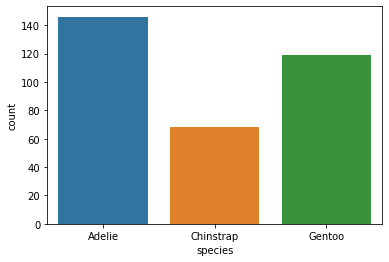

In [7]:
#plot 
sns.countplot(penguins["species"])

Text(0.5, 1.0, 'penguins by length')

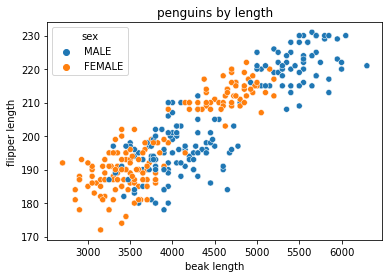

In [8]:
# scatterplot 
plot=sns.scatterplot(data=penguins,x="body_mass_g",y="flipper_length_mm",hue="sex")
plot.set_xlabel("beak length")
plot.set_ylabel("flipper length")
plot.set_title("penguins by length")

<AxesSubplot:>

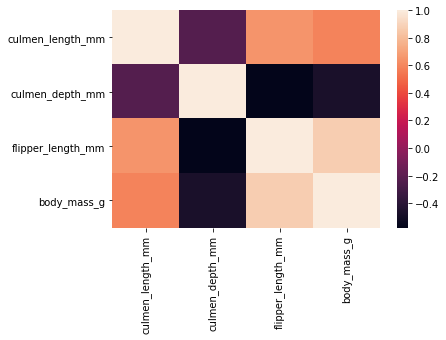

In [9]:
#heatmap 
sns.heatmap(penguins[["culmen_length_mm","culmen_depth_mm","flipper_length_mm","body_mass_g"]].corr())

## Data processing

In [10]:
from matplotlib.pyplot import xlim
#separate out the target form the predictors

y=penguins["species"]
X=penguins.drop("species", axis=1)

Ensure that data is in an appropriate format for the algorithm

In [11]:
X=pd.get_dummies(X)

X= X.drop("sex_MALE", axis=1)

In [12]:
y

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
328    Gentoo
329    Gentoo
330    Gentoo
331    Gentoo
332    Gentoo
Name: species, Length: 333, dtype: object

In [13]:
#seprate out training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=451)


In [14]:
X_train.shape

(266, 8)

In [15]:
X_test.shape

(67, 8)

## Model training

In [27]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

In [28]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
#Predict the response for test dataset
model.predict(X_train)

array(['Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo',

In [30]:
model.score(X_train, y_train)

1.0

In [31]:
model.predict(X_test)

array(['Adelie', 'Gentoo', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Chinstrap', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Gentoo', 'Adelie', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Chinstrap'], dtype=object)

In [32]:
model.score(X_test, y_test)

1.0

[Text(217.62000000000003, 199.32, 'X[2] <= 206.5\ngini = 0.632\nsamples = 266\nvalue = [118, 50, 98]'),
 Text(150.66000000000003, 163.07999999999998, 'X[0] <= 43.35\ngini = 0.41\nsamples = 162\nvalue = [116, 45, 1]'),
 Text(83.70000000000002, 126.83999999999999, 'X[0] <= 42.35\ngini = 0.065\nsamples = 118\nvalue = [114, 4, 0]'),
 Text(50.220000000000006, 90.6, 'X[1] <= 16.65\ngini = 0.018\nsamples = 109\nvalue = [108, 1, 0]'),
 Text(33.480000000000004, 54.359999999999985, 'X[0] <= 39.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1, 0]'),
 Text(16.740000000000002, 18.119999999999976, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(50.220000000000006, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 100\nvalue = [100, 0, 0]'),
 Text(117.18, 90.6, 'X[1] <= 17.45\ngini = 0.444\nsamples = 9\nvalue = [6, 3, 0]'),
 Text(100.44000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 

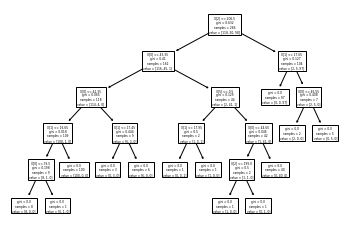

In [33]:
plot_tree(model)

Text(0.5, 1.0, 'Tree')

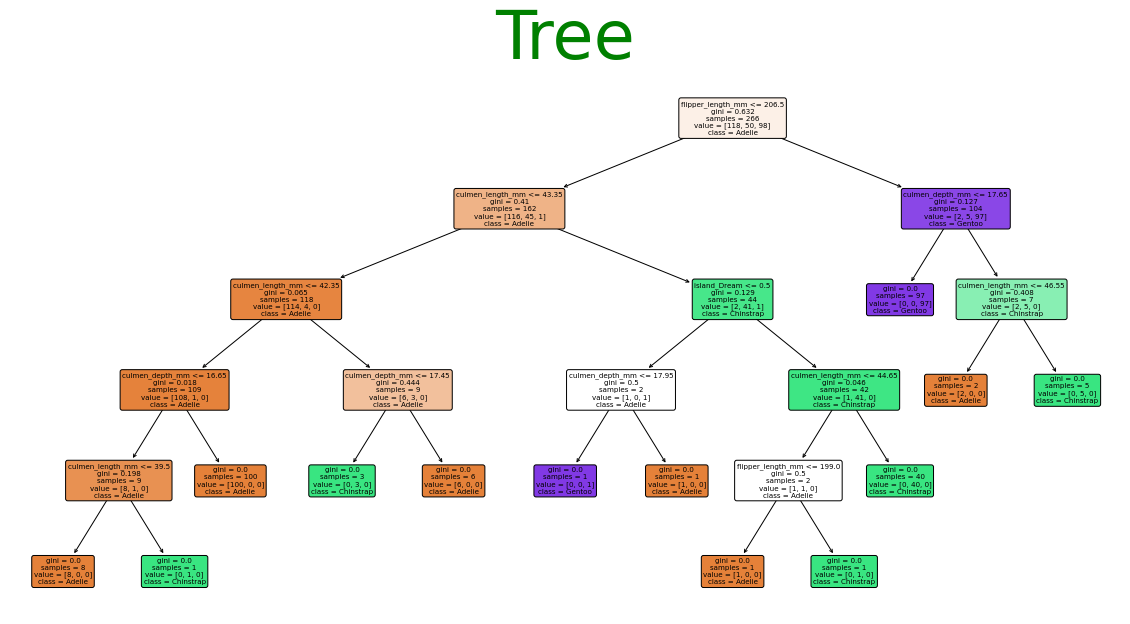

In [34]:
plt.figure(figsize=(20,10))
plot_tree(model, rounded=True, feature_names=X_test.columns, class_names=model.classes_, filled=True)
plt.title("Tree", fontdict={"color":"green", "fontsize":67})